In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
root_dir = "../../static/human_evaluation/"

result_files = [x for x in os.listdir(root_dir) if x.endswith("_questionnaire.csv")]
dfs = [pd.read_csv(f, index_col=0) for f in result_files]

result_files2 = [x for x in os.listdir(root_dir) if x.endswith("_questionnaire2.csv")]
dfs2 = [pd.read_csv(f, index_col=0) for f in result_files2]


In [81]:
df = pd.concat(dfs)
df2= pd.concat(dfs2)

df = df.replace(['greyroads_aeo_min_freq_40_1997_2020_ngram', 
                 'greyroads_ieo_min_freq_40_1997_2020_ngram',
                 'journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150'],
               ['AEO', 'IEO', 'Journals'])

df2 = df2.replace(['greyroads_aeo_min_freq_40_1997_2020_ngram', 
                 'greyroads_ieo_min_freq_40_1997_2020_ngram',
                 'journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150'],
               ['AEO', 'IEO', 'Journals'])


df = df.replace(['emb', 'tfidf', 'baseline'],
                ['Embedding', 'TFIDF', 'Baseline'])

df2 = df2.replace(['emb', 'tfidf', 'baseline'],
                ['Embedding', 'TFIDF', 'Baseline'])

In [82]:
df.groupby('human_choice').count()['multi_choice']

human_choice
Baseline      32
Embedding    205
TFIDF        228
Name: multi_choice, dtype: int64

In [83]:
df2.groupby('human_choice').count()['multi_choice']

human_choice
Baseline      5
Embedding    90
TFIDF        85
Name: multi_choice, dtype: int64

In [84]:
df.groupby('dataset').count()['multi_choice']

dataset
AEO         157
IEO         163
Journals    145
Name: multi_choice, dtype: int64

In [85]:
df2.groupby('dataset').count()['multi_choice']

dataset
AEO         58
IEO         68
Journals    54
Name: multi_choice, dtype: int64

In [86]:
plot_df = df.groupby(['human_choice', 'dataset']).count()
plot_df.reset_index(inplace=True)

plot_df2 = df2.groupby(['human_choice', 'dataset']).count()
plot_df2.reset_index(inplace=True)

In [87]:
plot_df = plot_df.loc[:, ['human_choice', 'dataset', 'tfidf']]
plot_df = plot_df.rename(columns={"tfidf": "count"})

plot_df2 = plot_df2.loc[:, ['human_choice', 'dataset', 'tfidf']]
plot_df2 = plot_df2.rename(columns={"tfidf": "count"})

In [88]:
total = plot_df['count'].sum()
plot_df['count'] = plot_df['count'].apply(lambda x: x/total)

total2 = plot_df2['count'].sum()
plot_df2['count'] = plot_df2['count'].apply(lambda x: x/total2)

In [90]:
plot_df2

,human_choice,dataset,count
0,Baseline,AEO,0.011111
1,Baseline,IEO,0.011111
2,Baseline,Journals,0.005556
3,Embedding,AEO,0.144444
4,Embedding,IEO,0.211111
5,Embedding,Journals,0.144444
6,TFIDF,AEO,0.166667
7,TFIDF,IEO,0.155556
8,TFIDF,Journals,0.150000


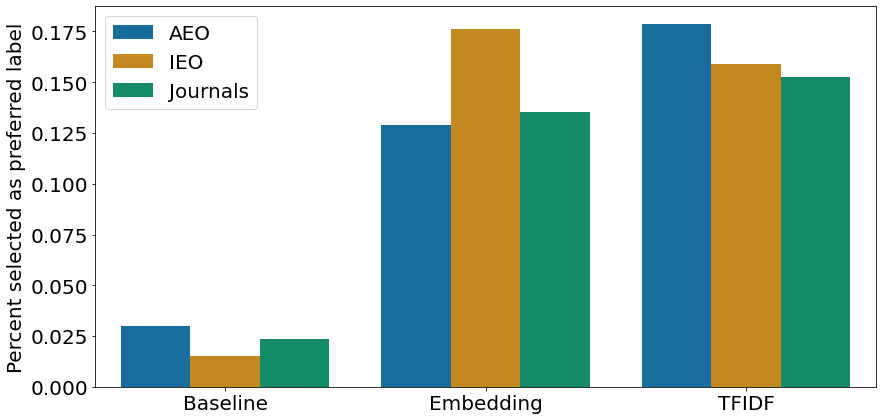

In [91]:
fontsize=20

fig = plt.figure(figsize=(14,7))
sns.barplot(data=plot_df, 
            palette="colorblind", 
            x="human_choice", y="count", hue="dataset").set(xlabel=None)
plt.legend(loc='upper left', prop={'size': fontsize})
plt.ylabel('Percent selected as preferred label', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.savefig("./annotation.png",dpi=300, bbox_inches = "tight")

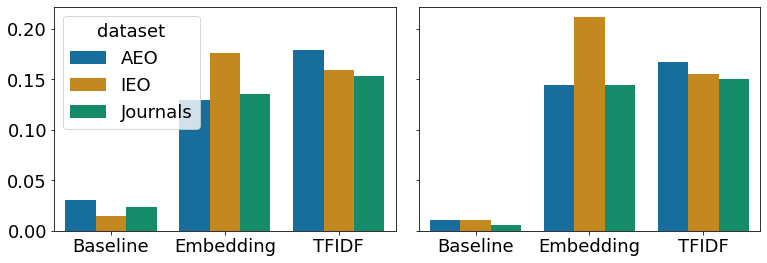

In [173]:
fontsize=20
plt.rcParams['font.size'] = '18'

fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True, squeeze=False)
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize)


sns.barplot(ax=axes[0][0], data=plot_df, 
            palette="colorblind", 
            x="human_choice", y="count", hue="dataset").set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[0][1], data=plot_df2, 
            palette="colorblind", 
            x="human_choice", y="count", hue="dataset").set(xlabel=None, ylabel=None)

axes[0][1].get_legend().remove()
# axes[0][0].legend(ncol=3)
# plt.legend(loc='upper center', bbox_to_anchor=(0., 1.05), ncol=3)


plt.tight_layout()
plt.savefig("./annotation.png",dpi=300, bbox_inches = "tight")

In [13]:
question_df = pd.read_pickle("./static/data/mturk_final_reduced.pickle")
# we ensure that 9 of the questions are the same between any questionnaires
df_by_weight = question_df.sort_values(by=["dataset", "weights"], ascending=False)
index_set = []
aeo = df_by_weight.loc[df_by_weight['dataset']=="greyroads_aeo_min_freq_40_1997_2020_ngram"].head(3)
ieo = df_by_weight.loc[df_by_weight['dataset']=="greyroads_ieo_min_freq_40_1997_2020_ngram"].head(3)
journals = df_by_weight.loc[df_by_weight['dataset']=="journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150"].head(3)

In [14]:
inds = aeo.index.tolist() + journals.index.tolist() + ieo.index.tolist()

In [15]:
df['index'] = df.index
df.groupby(['index', 'human_choice']).count().loc[inds]

top_words  tfidf  embedding  dataset  model  weights  \
index human_choice                                                         
30    tfidf                 6      6          6        6      6        6   
46    baseline              1      1          1        1      1        1   
      emb                   4      4          4        4      4        4   
      tfidf                 2      2          2        2      2        2   
54    baseline              1      1          1        1      1        1   
      emb                   2      2          2        2      2        2   
      tfidf                 6      6          6        6      6        6   
20    emb                   1      1          1        1      1        1   
      tfidf                 5      5          5        5      5        5   
7     emb                   4      4          4        4      4        4   
      tfidf                 1      1          1        1      1        1   
4     emb                   4      4          4        4      4        4   
      tfidf                 2      2          2        2      2        2   
76    emb                   1      1          1        1      1        1   
      tfidf                 4      4          4        4      4        4   
67    emb                   3      3          3        3      3        3   
      tfidf                 3      3          3        3      3        3   
87    emb                   4      4          4        4      4        4   
      tfidf                 2      2          2        2      2        2   

                    multi_choice  
index human_choice                
30    tfidf                    6  
46    baseline                 1  
      emb                      4  
      tfidf                    2  
54    baseline                 1  
      emb                      2  
      tfidf                    6  
20    emb                      1  
      tfidf                    5  
7     emb                      4  
      tfidf                    1  
4     emb                      4  
      tfidf                    2  
76    emb                      1  
      tfidf                    4  
67    emb                      3  
      tfidf                    3  
87    emb                      4  
      tfidf                    2

In [2]:
result_files

['1631769641.7161226_questionnaire.csv',
 '1631682664.563143_questionnaire.csv',
 '1631701698.8368046_questionnaire.csv',
 '1631793468.9378352_questionnaire.csv',
 '1631693842.9728518_questionnaire.csv',
 '1631612079.9792643_questionnaire.csv',
 '1631792473.796265_questionnaire.csv',
 '1631693852.6951134_questionnaire.csv',
 '1631780452.9945455_questionnaire.csv',
 '1631691359.4098203_questionnaire.csv']

In [66]:
questionnaire = pd.read_pickle("./static/data/mturk_final_reduced_top1.pickle")

In [67]:
top_words = questionnaire['top_words']
tfidf = questionnaire['tfidf'].to_numpy()
emb = questionnaire['embedding'].to_numpy()
questionnaire['top_words']

0     [(0.2814950666697298, power), (0.2414588962377...
1     [(0.3121060241322912, fuel), (0.12164852307639...
2     [(0.32075350703622585, market), (0.23533495294...
3     [(0.26788428504733525, cost), (0.2173265421198...
4     [(0.3339845981177336, emission), (0.1195350015...
                            ...                        
85    [(0.27178815904789105, emission), (0.116026264...
86    [(0.19664933699706738, oil), (0.15828612847790...
87    [(0.21463522876849453, generation), (0.1126790...
88    [(0.20971294466981025, energy), (0.19028944827...
89    [(0.3337748714366334, case), (0.10881669534850...
Name: top_words, Length: 90, dtype: object

In [44]:
new_df = pd.DataFrame([*top_words], columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])
new_df

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
0,"(0.2814950666697298, power)","(0.2414588962377678, system)","(0.11754153696260229, heat)","(0.07225017488814223, generation)","(0.06429135899845657, electricity)","(0.057083478661588666, chp)","(0.05036248076080362, energy)","(0.04161238301685071, electric)","(0.03957228287328841, district_heating)","(0.03433234093076981, electrical)"
1,"(0.3121060241322912, fuel)","(0.12164852307639636, biofuel)","(0.11091251351861026, ethanol)","(0.09049465529456782, production)","(0.06694511082862518, transport)","(0.0651519283196546, biodiesel)","(0.06119950199823692, oil)","(0.05941016654816914, transportation)","(0.058594706249226566, gasoline)","(0.053536870034222174, use)"
2,"(0.32075350703622585, market)","(0.23533495294416695, price)","(0.1442558401390668, electricity)","(0.05035335299567754, paper)","(0.04654512188923257, competition)","(0.04290463671478347, company)","(0.04163197000920023, investment)","(0.04152596658580716, risk)","(0.038997297095047706, reform)","(0.037697354590791946, industry)"
3,"(0.26788428504733525, cost)","(0.2173265421198272, electricity)","(0.12289666271003834, demand)","(0.07647326463298917, utility)","(0.060755808499878515, program)","(0.056724321635786674, load)","(0.051481709620060385, saving)","(0.05050306844514126, rate)","(0.049238558485090726, benefit)","(0.04671577880385226, peak)"
4,"(0.3339845981177336, emission)","(0.11953500157574334, carbon)","(0.10197292373381363, reduction)","(0.08585954681115927, cost)","(0.08230985769854464, ghg)","(0.07805651425856423, greenhouse_gas)","(0.0576938411531453, reduce)","(0.050569730670759844, policy)","(0.046504656357419474, result)","(0.04351332962311678, country)"
...,...,...,...,...,...,...,...,...,...,...
85,"(0.27178815904789105, emission)","(0.11602626403676679, sulfur)","(0.11070617678715827, reduce)","(0.08853658520111038, reduction)","(0.08782113065769359, standard)","(0.0718382063967017, fuel)","(0.06803260027726238, new)","(0.06307370924681044, require)","(0.06157375533252776, target)","(0.060603413016077794, dioxide)"
86,"(0.19664933699706738, oil)","(0.1582861284779074, barrel)","(0.13648737579401857, day)","(0.1063976166421264, price)","(0.08837474437859645, production)","(0.08649138906860501, case)","(0.07412374070496587, liquid)","(0.05378092230347252, opec)","(0.05351380168027575, increase)","(0.04589494395296468, high)"
87,"(0.21463522876849453, generation)","(0.11267904731297683, natural_gas)","(0.10741954317621161, renewable)","(0.10022869513126156, nuclear)","(0.08545292144353839, capacity)","(0.08389187006520164, electricity)","(0.0827937607446054, cost)","(0.07359217088634998, increase)","(0.07295418156057554, coal)","(0.06635258091078446, power)"
88,"(0.20971294466981025, energy)","(0.19028944827699656, intensity)","(0.10065447163226374, gdp)","(0.09069847540495993, case)","(0.07673427789625895, economic_growth)","(0.07304306463397414, btu)","(0.07165430045436329, capita)","(0.0659362096968617, high)","(0.06231213525969611, energy_consumption)","(0.05896467207481555, change)"


In [45]:
len([x[0] for x in tfidf])

90

In [46]:
new_df['t1'] = [x[0] for x in tfidf]
new_df['t2'] = [x[1] for x in tfidf]
new_df['t3'] = [x[2] for x in tfidf]
new_df['t4'] = [x[3] for x in tfidf]
new_df['e1'] = [x[0] for x in emb]
new_df['e2'] = [x[1] for x in emb]
new_df['e3'] = [x[2] for x in emb]
new_df['e4'] = [x[3] for x in emb]

In [56]:
new_df = new_df.merge(questionnaire.loc[:, ['dataset', 'model']], left_index=True, right_index=True)
new_df.to_csv("dataset_labels_split.csv")

In [9]:
df = pd.read_csv("1632024001.0274496_questionnaire.csv")
df.groupby("human_choice").count()

,Unnamed: 0,top_words,tfidf,embedding,dataset,model,weights,multi_choice
human_choice,,,,,,,,
baseline,2,2,2,2,2,2,2,2
emb,14,14,14,14,14,14,14,14
tfidf,14,14,14,14,14,14,14,14


In [27]:
same = []
tfidf_top1 = []
emb_top1 = []
for row in questionnaire.itertuples():
    tfidf = sorted(row.tfidf, key=lambda x: x[1], reverse=True)[0]
    emb = sorted(row.embedding, key=lambda x: x[1], reverse=True)[0]
    same.append(tfidf[0]==emb[0])
    tfidf_top1.append(tfidf)
    emb_top1.append(emb)
questionnaire['top1_same'] = same
questionnaire['tfidf_top1'] = tfidf_top1
questionnaire['emb_top1'] = emb_top1

In [30]:
questionnaire.loc[:, ['top1_same', 'tfidf_top1', 'emb_top1', 'dataset']].to_csv("top1.csv", index=False)

In [31]:
questionnaire.groupby(["top1_same"]).count()

,top_words,tfidf,embedding,dataset,model,weights,multi_choice,tfidf_top1,emb_top1
top1_same,,,,,,,,,
False,67,67,67,67,67,67,67,67,67
True,23,23,23,23,23,23,23,23,23
